In [1]:
#読み込むチャンネルなどの設定

import lal
import lalframe
import numpy as np
import scipy
from matplotlib import pyplot as plt

# Location of strain data
str_dir = "../Hongo-Data-1/iKAGRA/proc/11447/"
#str_dir = "/Hongo-Data-1/iKAGRA/proc/11447/"
str_root = [
    #"K-K1_PROC_C00-1144700000-32.gwf",
    #"K-K1_PROC_C00-1144700032-32.gwf",
    #"K-K1_PROC_C00-1144700064-32.gwf",
    #"K-K1_PROC_C00-1144700096-32.gwf",
    "K-K1_PROC_C00-1144700128-32.gwf",
    "K-K1_PROC_C00-1144700160-32.gwf"#,
    #"K-K1_PROC_C00-1144700192-32.gwf",
    #"K-K1_PROC_C00-1144700224-32.gwf",
    #"K-K1_PROC_C00-1144700256-32.gwf",
    #"K-K1_PROC_C00-1144700288-32.gwf",
    #"K-K1_PROC_C00-1144700320-32.gwf"
]
str_idx = 1 # strain channel

# Location of enviroment data
env_dir = "../Hongo-Data-1/iKAGRA/full/11447/"
#env_dir = "/Hongo-Data-1/iKAGRA/full/11447/"
env_root = [
    #"K-K1_C-1144700000-32.gwf",
    #"K-K1_C-1144700032-32.gwf",
    #"K-K1_C-1144700064-32.gwf",
    #"K-K1_C-1144700096-32.gwf",
    "K-K1_C-1144700128-32.gwf",
    "K-K1_C-1144700160-32.gwf"#,
    #"K-K1_C-1144700192-32.gwf",
    #"K-K1_C-1144700224-32.gwf",
    #"K-K1_C-1144700256-32.gwf",
    #"K-K1_C-1144700288-32.gwf",
    #"K-K1_C-1144700320-32.gwf"
]
env_idx = 8951 # enviroment channel

num_files = len(str_root)

# Location of output
outdir = "../test/"
outroot = "K-K1_1144700000-32"

In [2]:
#ストレインおよび環境チャンネルの読み込み

from lalframe.utils import frtools
from lalframe import frread

dur = 0.
for i in range(num_files):
    fname = str_dir+str_root[i]
    str_ch = frtools.get_channels(fname)
    data_strain = frread.read_timeseries(fname,channel=str_ch[str_idx])

    fname = env_dir+env_root[i]
    env_ch = frtools.get_channels(fname)
    data_env = frread.read_timeseries(fname,channel=env_ch[env_idx])

    t_str = data_strain.deltaT*data_strain.data.data.size
    t_env = data_env.deltaT*data_env.data.data.size
    if  t_str != t_env: # check if duration of strain and environment data are the same
        print "Error: durations of strain and environment data do not match"
    dur += t_str

    if i==0: 
        strain = np.array(data_strain.data.data)
        env = np.array(data_env.data.data)
    else:
        strain = np.append(strain,data_strain.data.data)
        env = np.append(env,data_env.data.data)

num_str = strain.size
num_env = env.size

fs_env = num_env/dur
fs_str = num_str/dur

print "Duration:",dur
print "Number of points in strain data:",num_str
print "Number of points in environment data:",num_env
print "Sampling frequency of strain data:",fs_str
print "Sampling frequency of environment data:",fs_env

Duration: 64.0
Number of points in strain data: 1048576
Number of points in environment data: 1024
Sampling frequency of strain data: 16384.0
Sampling frequency of environment data: 16.0


In [3]:
#ダウンサンプリング
import scipy.signal as sig

num_t = min(num_str,num_env)
#num_t = max(num_str,num_env)

print "Number of data points for ICA:",num_t
fs = num_t/dur
print "Sampling rate:",fs
arr_time = np.linspace(0,dur,num_t)

arr_str = np.empty(num_t,dtype=float)
arr_str = sig.resample(strain,num_t) # you may get warning here

arr_env = np.empty(num_t,dtype=float)
arr_env = sig.resample(env,num_t) # you may get warning here


Number of data points for ICA: 1024
Sampling rate: 16.0


/anaconda3/envs/py27/lib/python2.7/site-packages/scipy/signal/signaltools.py:2223: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/anaconda3/envs/py27/lib/python2.7/site-packages/scipy/signal/signaltools.py:2225: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/anaconda3/envs/py27/lib/python2.7/site-packages/scipy/signal/signaltools.py:2230: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as a

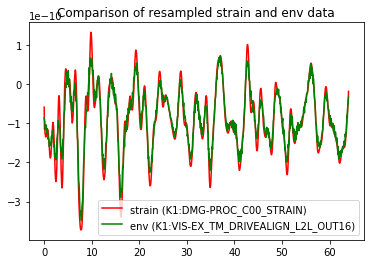

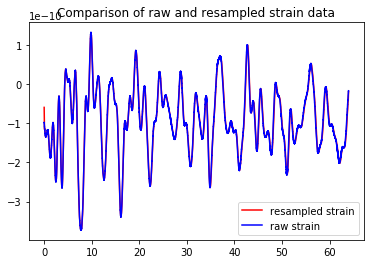

In [4]:
#データのプロット

#normalization factor only for visualization
norm_env = 1.2e12

plt.figure()
plt.title('Comparison of resampled strain and env data')
plt.plot(arr_time,arr_str,'r',label='strain ('+str_ch[str_idx]+')')
plt.plot(arr_time,arr_env/norm_env,'g',label='env ('+env_ch[env_idx]+')')
plt.legend()
plt.show()

plt.figure()
plt.title('Comparison of raw and resampled strain data')
plt.plot(arr_time,arr_str,'r',label='resampled strain')
plt.plot(np.arange(dur,step=1/fs_str),strain,'b',label='raw strain')
plt.legend()
plt.show()

/anaconda3/envs/py27/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


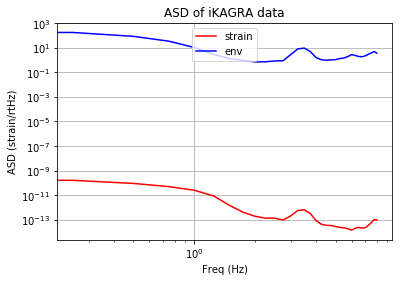

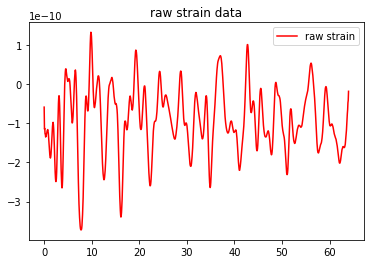

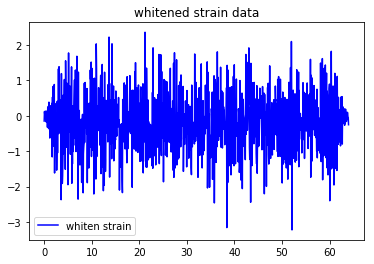

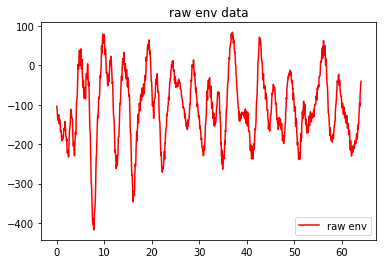

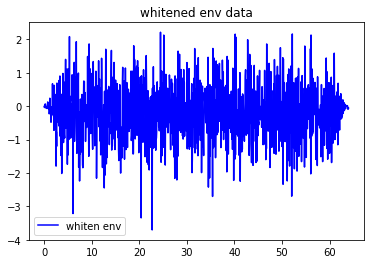

In [5]:
#ホワイトニング
import matplotlib.mlab as mlab
from scipy.interpolate import interp1d

# number of sample for the fast fourier transform:
NFFT = 4*int(fs)
NOVL = NFFT/2

dwindow = sig.tukey(num_t, alpha=1./8)  
psd_window = np.blackman(NFFT)

Pxx_str, freqs = mlab.psd(arr_str*dwindow, Fs = fs, NFFT = NFFT, window=psd_window, noverlap=NOVL)
Pxx_env, freqs = mlab.psd(arr_env*dwindow, Fs = fs, NFFT = NFFT, window=psd_window, noverlap=NOVL)

# We will use interpolations of the ASDs computed above for whitening:
psd_str = interp1d(freqs, Pxx_str)
psd_env = interp1d(freqs, Pxx_env)

# plot the ASDs:
plt.figure()
plt.loglog(freqs, np.sqrt(Pxx_str),'r',label='strain')
plt.loglog(freqs, np.sqrt(Pxx_env),'b',label='env')
#plt.axis([fmin, fmax, 1e-24, 1e-19])
plt.grid('on')
plt.ylabel('ASD (strain/rtHz)')
plt.xlabel('Freq (Hz)')
plt.legend(loc='upper center')
plt.title('ASD of iKAGRA data')
plt.savefig(outdir+outroot+'_ASDs.png')

# function to whiten data
def whiten(data, interp_psd, dt):
    Nt = len(data)
    freqs = np.fft.rfftfreq(Nt, dt)

    # whitening: transform to freq domain, divide by asd, then transform back, 
    # taking care to get normalization right.
    hf = np.fft.rfft(data)
    white_hf = hf / (np.sqrt(interp_psd(freqs) /dt/2.))
    white_ht = np.fft.irfft(white_hf, n=Nt)
    return white_ht

# now whiten the data from H1 and L1, and also the NR template:
arr_str_whiten = whiten(arr_str*dwindow,psd_str,1/fs)
arr_env_whiten = whiten(arr_env*dwindow,psd_env,1/fs)

# strain data
plt.figure()
plt.title('raw strain data')
plt.plot(arr_time,arr_str,'r',label='raw strain')
plt.legend()
plt.savefig(outdir+outroot+'_raw_strain.png')
plt.figure()
plt.title('whitened strain data')
plt.plot(arr_time,arr_str_whiten,'b',label='whiten strain')
plt.legend()
plt.savefig(outdir+outroot+'_whiten_strain.png')

# strain data
plt.figure()
plt.title('raw env data')
plt.plot(arr_time,arr_env,'r',label='raw env')
plt.legend()
plt.savefig(outdir+outroot+'_raw_env.png')
plt.figure()
plt.title('whitened env data')
plt.plot(arr_time,arr_env_whiten,'b',label='whiten env')
plt.legend()
plt.savefig(outdir+outroot+'_whiten_env.png')

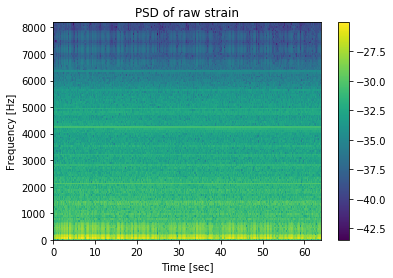

In [7]:
#生のストレインデータのPSD
f,t,Sxx = sig.spectrogram(strain,fs_str)

plt.figure()
plt.title('PSD of raw strain')
plt.pcolormesh(t, f, np.log10(Sxx))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar()
plt.show()

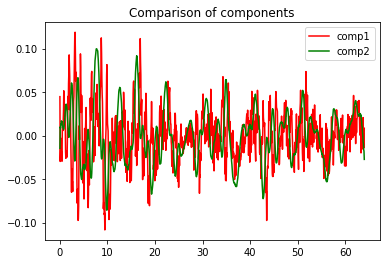

In [8]:
#FastICA
#%%timeit
from sklearn.decomposition import FastICA, PCA

X = np.c_[arr_str,arr_env]
ica = FastICA(n_components=2,whiten=True)
S = ica.fit_transform(X)
A = ica.mixing_  # Retrieving estimated mixing matrix

#独立成分のプロット
plt.figure()
plt.title('Comparison of components')
plt.plot(arr_time,S[:,0],'r',label="comp1")
plt.plot(arr_time,S[:,1],'g',label="comp2")
plt.legend()
plt.show()

[[ 1.00000000e+00 -7.81388639e-16]
 [-7.81388639e-16  1.00000000e+00]]


/anaconda3/envs/py27/lib/python2.7/site-packages/sklearn/decomposition/fastica_.py:295: UserWarning: Ignoring n_components with whiten=False.
  warnings.warn('Ignoring n_components with whiten=False.')
/anaconda3/envs/py27/lib/python2.7/site-packages/sklearn/decomposition/fastica_.py:118: UserWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


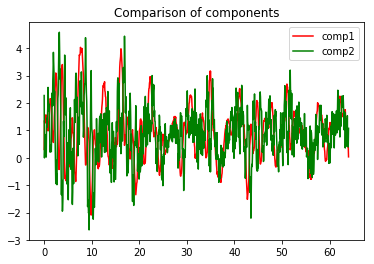

In [9]:
#FastICA with explicit whitening

Xw = np.c_[arr_str,arr_env]

#explicit whitening
Cov = np.cov(Xw.T)
norm = np.sqrt(Cov.diagonal())
Cov[:,:] = Cov[:,:]/norm[:,None]/norm[None,:]
la, v = np.linalg.eig(Cov)
Xw[:,:] = Xw[:,:]/norm[None,:]
Xw = np.dot(Xw,v)
Xw = Xw/np.sqrt(la[None,:])
print(np.cov(Xw.T))

#whiteningをしたデータのプロット
#plt.figure()
#plt.title('Whitened data')
#plt.plot(arr_time,Xw[:,0],'r',label="data1")
#plt.plot(arr_time,Xw[:,1],'g',label="data2")
#plt.legend()
#plt.show()

icaw = FastICA(n_components=2,whiten=False)
Sw = icaw.fit_transform(Xw)
Aw = icaw.mixing_  # Retrieving estimated mixing matrix

#独立成分のプロット
plt.figure()
plt.title('Comparison of components')
plt.plot(arr_time[:],Sw[:,0],'r',label="comp1")
plt.plot(arr_time[:],Sw[:,1],'g',label="comp2")
plt.legend()
plt.show()

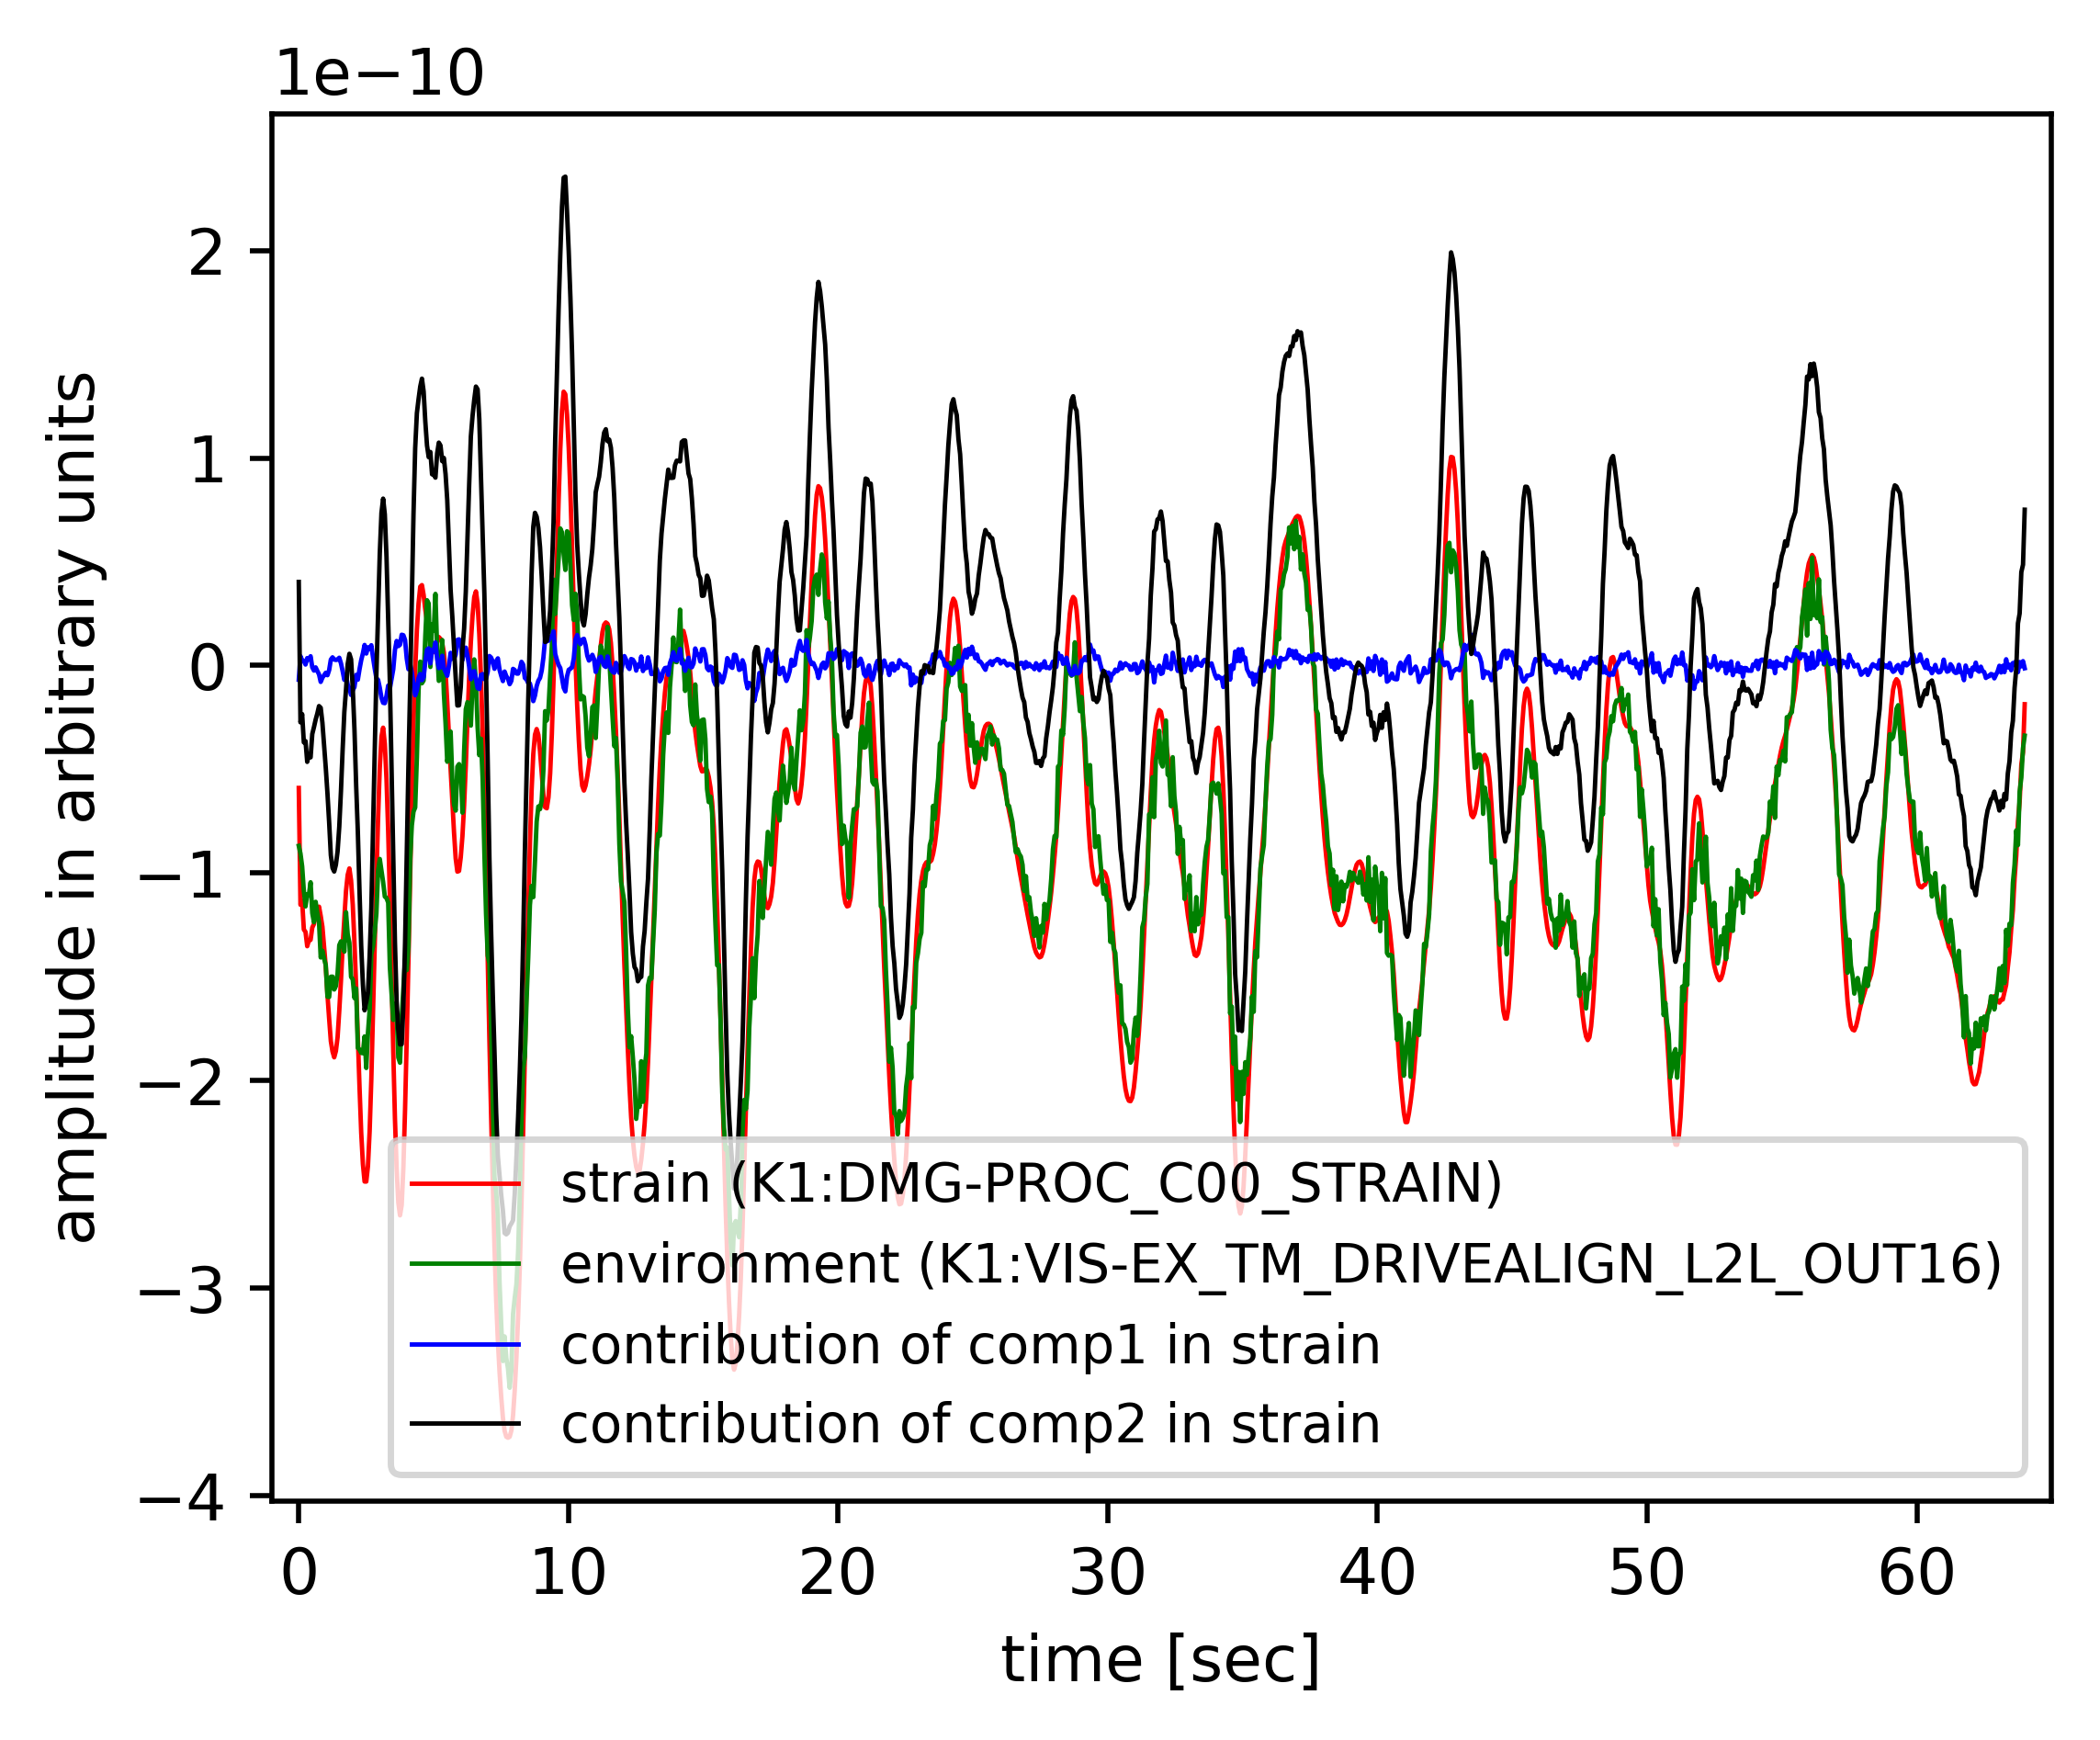

In [10]:
#各成分のストレインデータへの寄与の計算
X_ = np.dot(S,A.T) # 

S0 = np.zeros(np.shape(S))
S1 = np.zeros(np.shape(S))
S0[:,0] = S[:,0]
S1[:,1] = S[:,1]

X0_ = np.dot(S0,A.T)
X1_ = np.dot(S1,A.T)

plt.figure(figsize=(5,4),dpi=500)
plt.plot(arr_time,X[:,0],'r-',linewidth = 0.7,label='strain ('+str_ch[str_idx]+')')
plt.plot(arr_time,X[:,1]/norm_env,'g-',linewidth = 0.7,label='environment ('+env_ch[env_idx]+')')
plt.plot(arr_time,X0_[:,0],'b-',linewidth = 0.7,label='contribution of comp1 in strain')
plt.plot(arr_time,X1_[:,0],'k-',linewidth = 0.7,label='contribution of comp2 in strain')

plt.xlim(-1,dur+1)
#plt.ylim(-5e-10,5e-10)
plt.ylabel("amplitude in arbitrary units")
plt.xlabel("time [sec]")
plt.legend(fontsize='small')
#plt.savefig(outdir+outroot+'.png') 
plt.show()

In [168]:
#### 適当なテンプレートの作成
import math

#parameter for the tempelate
amp = 2.E-11
dur_temp = 32.
fudge_gamma = 2.#4.
fudge_omega = 4.#12.
gamma = fudge_gamma/dur_temp
omega = fs/fudge_omega
print(gamma,omega)

num_temp = int(dur_temp*fs)
offset_temp = (num_t-num_temp)//2

template_offset = int((dur-dur_temp)/2*fs)

arr_temp = np.empty(num_t)
for i in range(num_t):
    dt = (i-num_t/2)/fs
    arr_temp[i] = math.exp(-(gamma*dt)**2)*math.cos(dt*omega)*amp

(0.0625, 4.0)


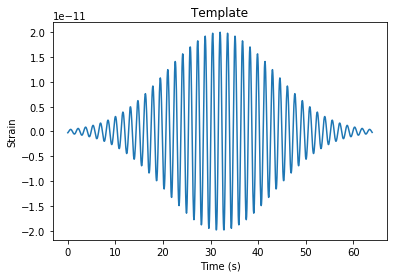

In [169]:
#テンプレートのプロット

plt.figure()
plt.plot(np.arange(dur,step=1./fs),arr_temp)
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.title('Template')
plt.show()

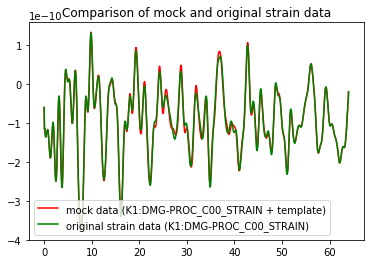

In [170]:
#モックデータの作成とプロット
arr_mock = np.array(arr_str,copy=True)
#arr_mock[offset_temp:offset_temp+num_temp] += arr_temp
arr_mock += arr_temp

plt.figure()
plt.title('Comparison of mock and original strain data')
plt.plot(arr_time,arr_mock,'r',label='mock data ('+str_ch[str_idx]+' + template)')
plt.plot(arr_time,arr_str,'g',label='original strain data ('+str_ch[str_idx]+')')
plt.legend()
plt.show()

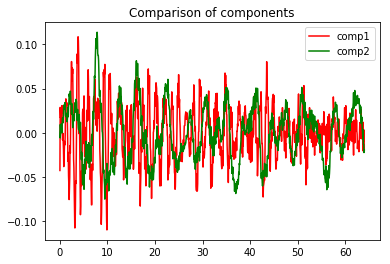

In [171]:
#モックデータを用いたFastICA
Xm = np.c_[arr_mock,arr_env]
icam = FastICA(n_components=2)
Sm = icam.fit_transform(Xm)
Am = icam.mixing_  # Retrieving estimated mixing matrix

# Plotting components
plt.figure()
plt.title('Comparison of components')
plt.plot(arr_time,Sm[:,0],'r',label="comp1")
plt.plot(arr_time,Sm[:,1],'g',label="comp2")
plt.legend()
plt.show()

# Plotting strain data separately
Xm_ = np.dot(Sm,Am.T) # 

S0m = np.zeros(np.shape(Sm))
S1m = np.zeros(np.shape(Sm))
S0m[:,0] = Sm[:,0]
S1m[:,1] = Sm[:,1]

X0m_ = np.dot(S0m,Am.T)
X1m_ = np.dot(S1m,Am.T)

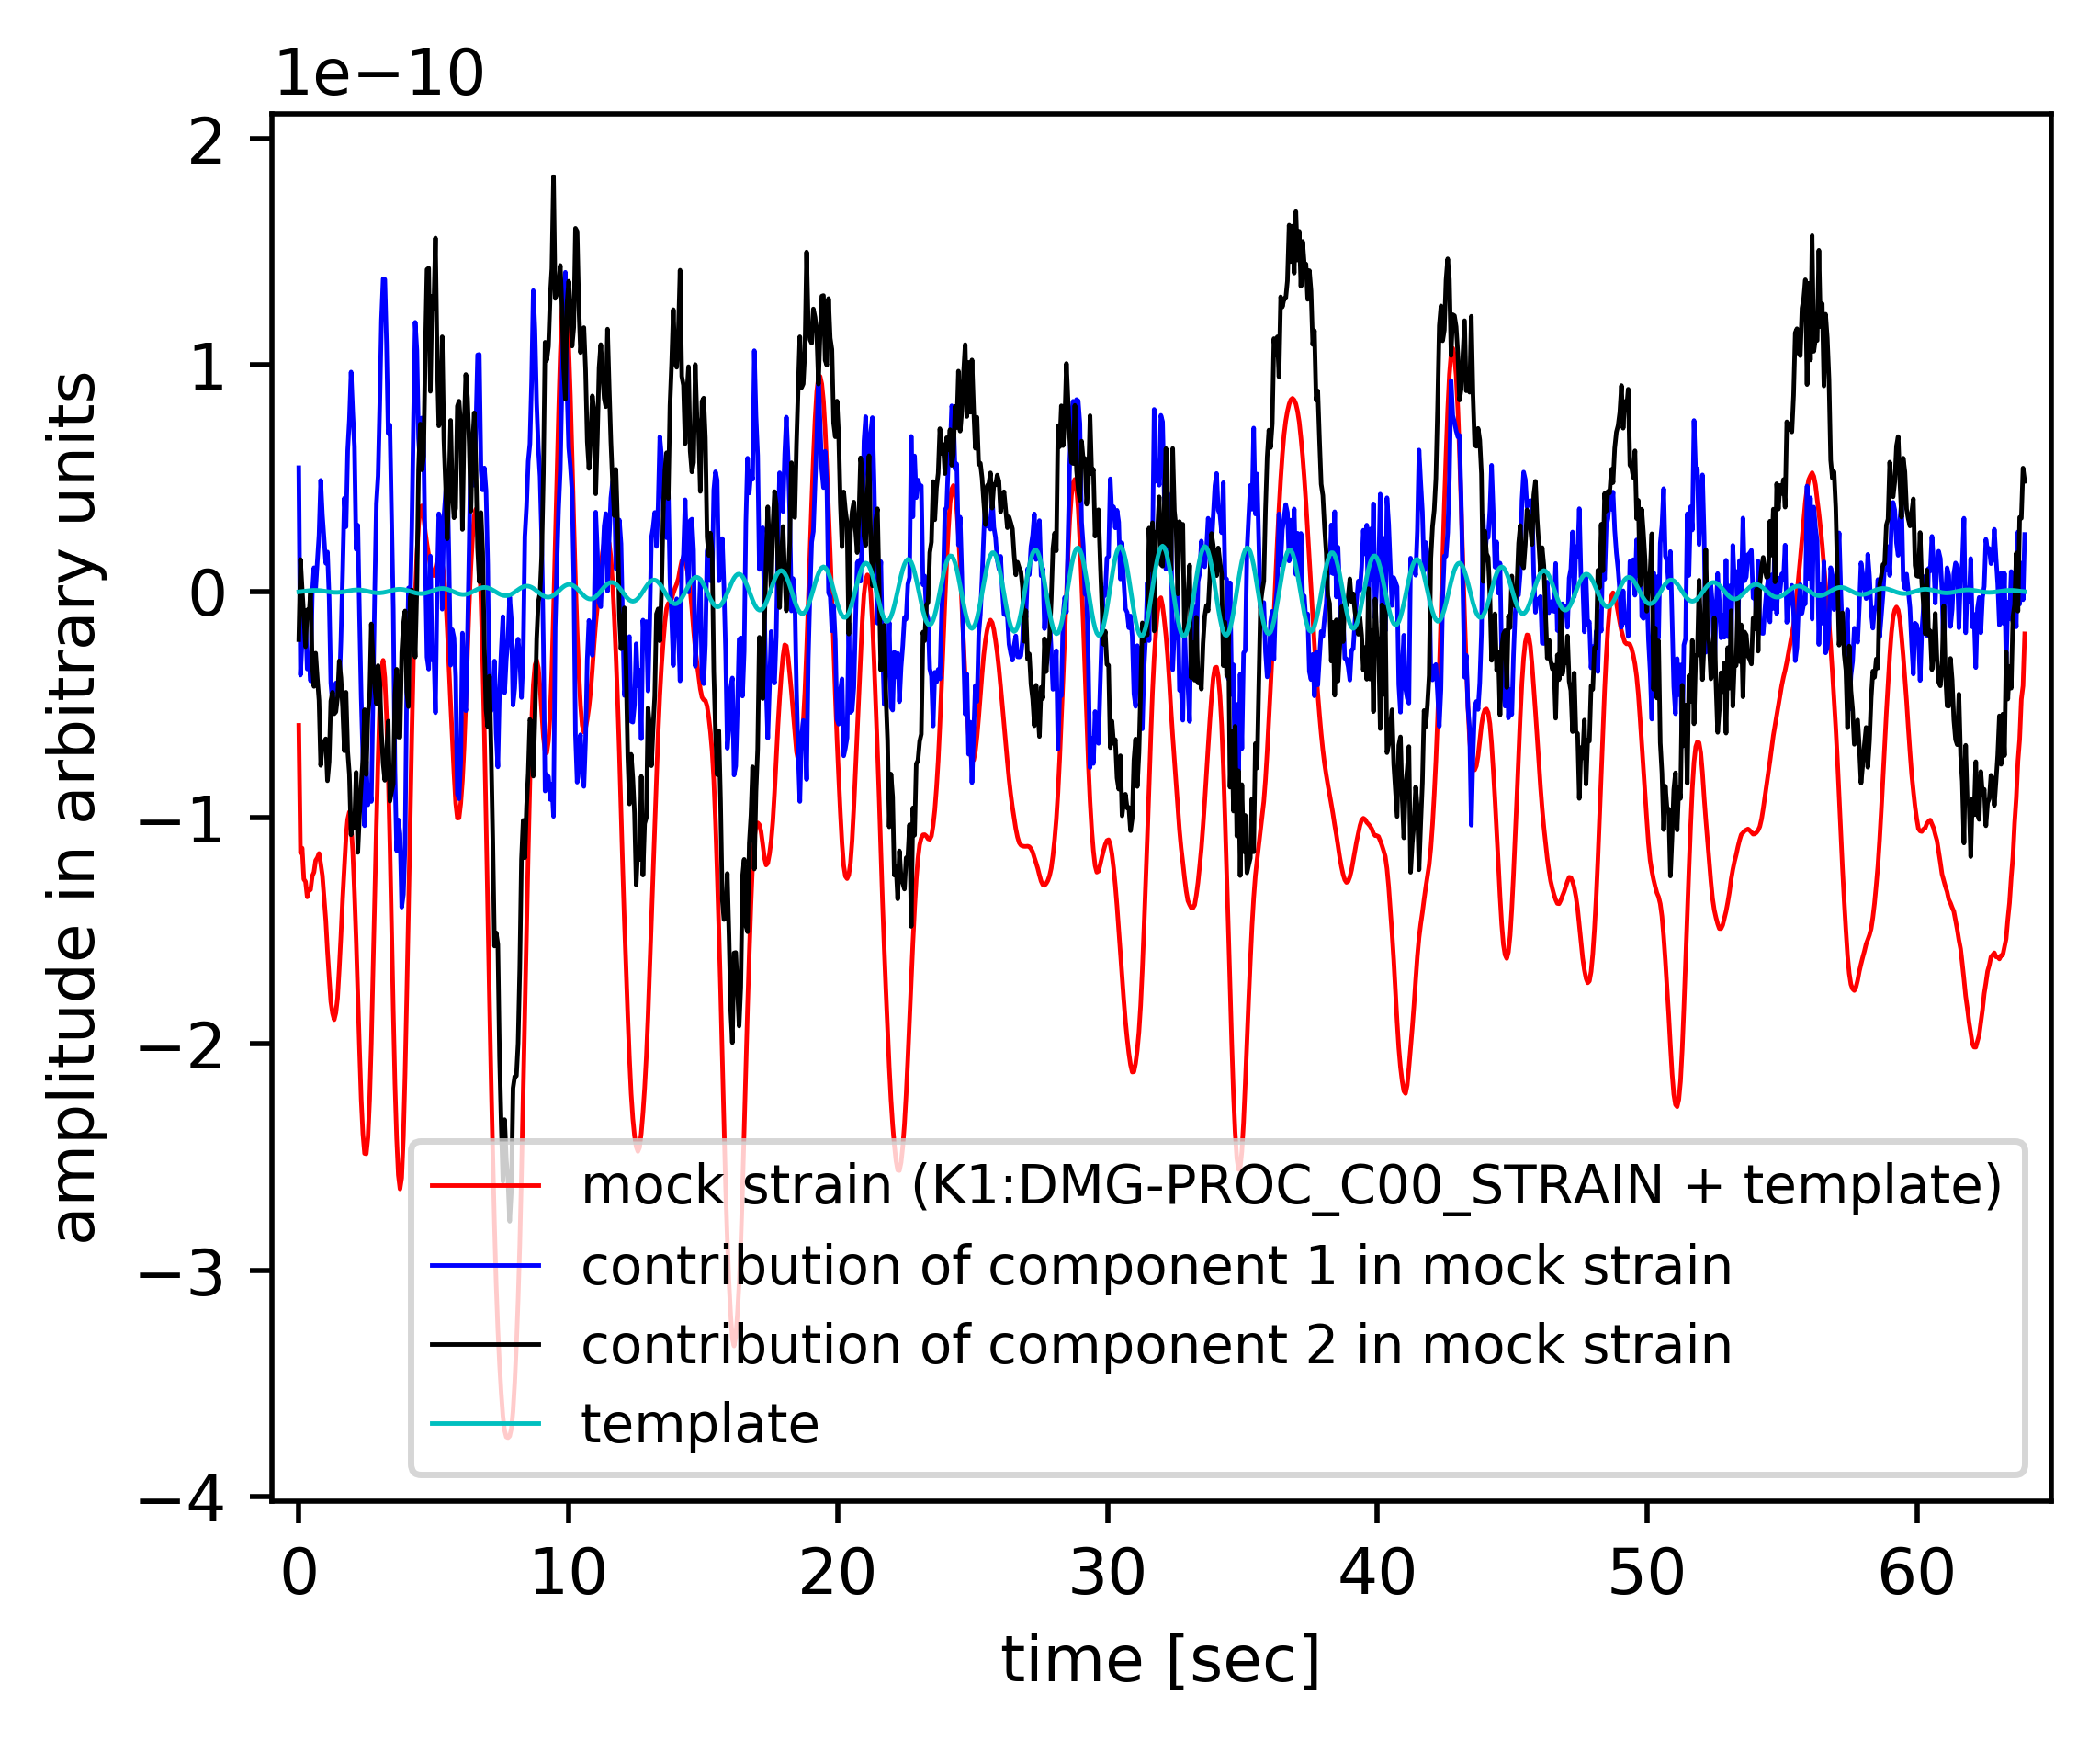

In [172]:
plt.figure(figsize=(5,4),dpi=500)
plt.plot(arr_time,Xm[:,0],'r-',linewidth = 0.7,label='mock strain ('+str_ch[str_idx]+' + template)')
#plt.plot(arr_time,Xm[:,1]/norm_env,'g-',linewidth = 0.7,label='environment ('+env_ch[env_idx]+')')
plt.plot(arr_time,X0m_[:,0],'b-',linewidth = 0.7,label=r'contribution of component 1 in mock strain ')#,label=str_ch[str_idx])
plt.plot(arr_time,X1m_[:,0],'k-',linewidth = 0.7,label=r'contribution of component 2 in mock strain ')#,label=str_ch[str_idx])
plt.plot(arr_time,arr_temp,'c-',linewidth = 0.7,label=r'template ')#,label=str_ch[str_idx])


plt.xlim(-1,dur+1)
#plt.ylim(-.1e-10,.1e-10)
plt.ylabel("amplitude in arbitrary units")
plt.xlabel("time [sec]")
plt.legend(fontsize='small')
plt.savefig(outdir+outroot+'.png')
plt.show()

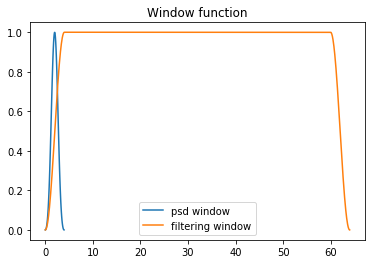

1024


In [173]:
#matched filteringの設定
#matched filteringについては以下のページを参照した
#https://losc.ligo.org/tutorial_optimal/
#https://losc.ligo.org/s/events/GW150914/LOSC_Event_tutorial_GW150914.html#Waveform-Template

NFFT = 4*int(fs)
psd_window = np.blackman(NFFT)
NOVL = NFFT/2 # 50% overlap:

datafreq = np.fft.fftfreq(num_t)*fs
df = np.abs(datafreq[1] - datafreq[0])

# to remove effects at the beginning and end of the data stretch, window the data
# https://en.wikipedia.org/wiki/Window_function#Tukey_window
try:   dwindow = sig.tukey(arr_temp.size, alpha=1./8)  
    # Tukey window preferred, but requires recent scipy version 
except: dwindow = sig.blackman(arr_temp.size)          
    # Blackman window OK if Tukey is not available

# plot of window function
plt.figure()
plt.plot(arr_time[:NFFT],psd_window,label='psd window')
plt.plot(arr_time,dwindow,label='filtering window')
plt.title('Window function')
plt.legend()
plt.show()

# prepare the template fft
arr_temp_fft = np.fft.fft(arr_temp*dwindow) / fs
print(arr_temp_fft.size)

In [174]:
#matched filteringをmock strainおよび成分ごとのmock strainについて行う

#import matplotlib.mlab as mlab
Xm_psd, Xm_freqs = mlab.psd(Xm_[:,0], Fs = fs, NFFT = NFFT, window=psd_window, noverlap=NOVL)
X0m_psd, X0m_freqs = mlab.psd(X0m_[:,0], Fs = fs, NFFT = NFFT, window=psd_window, noverlap=NOVL)
X1m_psd, X1m_freqs = mlab.psd(X1m_[:,0], Fs = fs, NFFT = NFFT, window=psd_window, noverlap=NOVL)

# Take the Fourier Transform (FFT) of the data and the template (with dwindow)
Xm_fft = np.fft.fft(Xm_[:,0]*dwindow) / fs
X0m_fft = np.fft.fft(X0m_[:,0]*dwindow) / fs
X1m_fft = np.fft.fft(X1m_[:,0]*dwindow) / fs

Xm_power_vec = np.interp(np.abs(datafreq), Xm_freqs, Xm_psd)
X0m_power_vec = np.interp(np.abs(datafreq), X0m_freqs, X0m_psd)
X1m_power_vec = np.interp(np.abs(datafreq), X1m_freqs, X1m_psd)

Xm_optimal = Xm_fft * arr_temp_fft.conjugate() / Xm_power_vec
Xm_optimal_time = 2*np.fft.ifft(Xm_optimal)*fs
X0m_optimal = X0m_fft * arr_temp_fft.conjugate() / X0m_power_vec
X0m_optimal_time = 2*np.fft.ifft(X0m_optimal)*fs
X1m_optimal = X1m_fft * arr_temp_fft.conjugate() / X1m_power_vec
X1m_optimal_time = 2*np.fft.ifft(X1m_optimal)*fs

# -- Normalize the matched filter output:
# Normalize the matched filter output so that we expect a value of 1 at times of just noise.
# Then, the peak of the matched filter output will tell us the signal-to-noise ratio (SNR) of the signal.
Xm_sigmasq = 1*(arr_temp_fft * arr_temp_fft.conjugate() / Xm_power_vec).sum() * df
Xm_sigma = np.sqrt(np.abs(Xm_sigmasq))
Xm_SNR_complex = Xm_optimal_time/Xm_sigma
Xm_SNR = abs(Xm_SNR_complex)
X0m_sigmasq = 1*(arr_temp_fft * arr_temp_fft.conjugate() / X0m_power_vec).sum() * df
X0m_sigma = np.sqrt(np.abs(X0m_sigmasq))
X0m_SNR_complex = X0m_optimal_time/X0m_sigma
X0m_SNR = abs(X0m_SNR_complex)
X1m_sigmasq = 1*(arr_temp_fft * arr_temp_fft.conjugate() / X1m_power_vec).sum() * df
X1m_sigma = np.sqrt(np.abs(X1m_sigmasq))
X1m_SNR_complex = X1m_optimal_time/X1m_sigma
X1m_SNR = abs(X1m_SNR_complex)

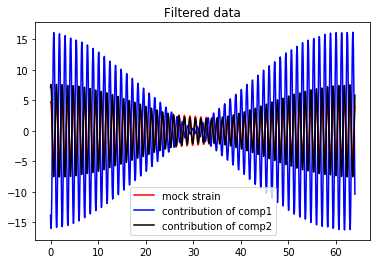

In [166]:
#フィルターされたデータのプロット
#コメント(2018 Sep 01):なぜ環境チャンネルと独立な成分はデータの端で振幅が大きい？
plt.figure()
plt.title('Filtered data')
plt.plot(arr_time, Xm_optimal_time,'r-',label=r'mock strain')
plt.plot(arr_time, X0m_optimal_time,'b-',label=r'contribution of comp1')
plt.plot(arr_time, X1m_optimal_time,'k-',label=r'contribution of comp2')
plt.legend()
plt.show()

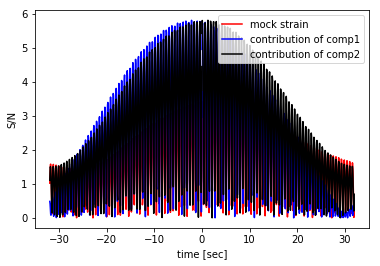

In [167]:
#S/Nのプロット
plt.figure()
#plt.yscale('log')
plt.plot(arr_time[:num_t//2],Xm_SNR[:num_t//2],'r-',label=r'mock strain')
plt.plot(arr_time[:num_t//2],X0m_SNR[:num_t//2],'b-',label=r'contribution of comp1')
plt.plot(arr_time[:num_t//2],X1m_SNR[:num_t//2],'k-',label=r'contribution of comp2')
plt.plot(arr_time[-num_t//2:]-dur,Xm_SNR[-num_t//2:],'r-')
plt.plot(arr_time[-num_t//2:]-dur,X0m_SNR[-num_t//2:],'b-')
plt.plot(arr_time[-num_t//2:]-dur,X1m_SNR[-num_t//2:],'k-')

#plt.xlim([dur/2-dur_temp,dur/2+dur_temp])
plt.xlabel('time [sec]')
plt.ylabel('S/N')
plt.legend()
plt.savefig(outdir+outroot+'_.png')
plt.show()

In [155]:
#matched filteringをmock strainおよび成分ごとのmock strainについて行う

#import matplotlib.mlab as mlab
Xme_psd, Xme_freqs = mlab.psd(Xm_[:,1], Fs = fs, NFFT = NFFT, window=psd_window, noverlap=NOVL)

# Take the Fourier Transform (FFT) of the data and the template (with dwindow)
Xme_fft = np.fft.fft(Xm_[:,1]*dwindow) / fs

Xme_power_vec = np.interp(np.abs(datafreq), Xme_freqs, Xme_psd)

Xme_optimal = Xme_fft * arr_temp_fft.conjugate() / Xme_power_vec
Xme_optimal_time = 2*np.fft.ifft(Xme_optimal)*fs

# -- Normalize the matched filter output:
# Normalize the matched filter output so that we expect a value of 1 at times of just noise.
# Then, the peak of the matched filter output will tell us the signal-to-noise ratio (SNR) of the signal.
Xme_sigmasq = 1*(arr_temp_fft * arr_temp_fft.conjugate() / Xme_power_vec).sum() * df
Xme_sigma = np.sqrt(np.abs(Xme_sigmasq))
Xme_SNR_complex = Xme_optimal_time/Xme_sigma
Xme_SNR = abs(Xme_SNR_complex)


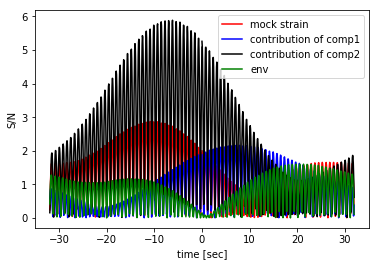

In [156]:
#S/Nのプロット
plt.figure()
#plt.yscale('log')
plt.plot(arr_time[:num_t//2],Xm_SNR[:num_t//2],'r-',label=r'mock strain')
plt.plot(arr_time[:num_t//2],X0m_SNR[:num_t//2],'b-',label=r'contribution of comp1')
plt.plot(arr_time[:num_t//2],X1m_SNR[:num_t//2],'k-',label=r'contribution of comp2')
plt.plot(arr_time[:num_t//2],Xme_SNR[:num_t//2],'g-',label=r'env')
plt.plot(arr_time[-num_t//2:]-dur,Xm_SNR[-num_t//2:],'r-')
plt.plot(arr_time[-num_t//2:]-dur,X0m_SNR[-num_t//2:],'b-')
plt.plot(arr_time[-num_t//2:]-dur,X1m_SNR[-num_t//2:],'k-')
plt.plot(arr_time[-num_t//2:]-dur,Xme_SNR[-num_t//2:],'g-')


#plt.xlim([dur/2-dur_temp,dur/2+dur_temp])
plt.xlabel('time [sec]')
plt.ylabel('S/N')
plt.legend()
plt.savefig(outdir+outroot+'_.png')
plt.show()